In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("amazon_laptop_prices_v01.csv")
df.head(10)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"
5,Acer,A315-24P-R7VH,15.6 Inches,Silver,128 GB,Ryzen 3,8 GB,Windows 11 S,Backlit Keyboard,Integrated,NaN,NaN,4.5,$299.99
6,Apple,MacBook Pro,13.3 Inches,Space Gray,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.7,$965.08
7,Acer,CB315-3HT,15.6 Inches,Silver,64 GB,Celeron N4020,4 GB,Chrome OS,Support Stylus,Integrated,NaN,NaN,4.4,$239.99
8,ASUS,ROG Strix G16,16 Inches,Eclipse Gray,512 GB,Core i7,16 GB,Windows 11 Home,Backlit Keyboard,Dedicated,NaN,NaN,4.4,"$1,274.03"
9,acer,A515-56-347N,15.6 Inches,Silver,128 GB,Core I3 1115G4,8 GB,Windows 11 S,Amazon Alexa,Integrated,NaN,NaN,4.3,$299.99


In [ ]:
df.columns = [x.lower().replace(" ", "_").replace("?", "")\
.replace(r"/", "").replace("\\", "").replace("-", "_")\
.replace("%", "").replace(r",", "") for x in df.columns]

Перегялдаю унікальні значення жорсткого диску і помічаю, що дані записані у різних форматах

In [ ]:
print("Унікальні значення в колонці 'harddisk':", df['harddisk'].unique())

Унікальні значення в колонці 'harddisk': ['1000 GB' nan '256 GB' '128 GB' '64 GB' '512 GB' '1 TB' '1152 GB' '64'
 '2 TB' '32 GB' '16 GB' '4 TB' '240 GB' '65 GB' '120 GB' '1024 GB'
 '300 GB' '320 GB' '2000 GB' '480 GB' '32 MB' '500 GB' '512' '128 MB'
 '250 GB' '160 GB' '64 MB' '8 GB' '8 TB' '4000 GB' '1256 GB' '1512 GB'
 '1.92 TB' '1.5 TB' '512 MB' '640 GB' '2048 GB' '256' '8000 GB' '6000 GB'
 '3 TB']


Кількість даних різна - треба чистити

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   os                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


Зводжу все до одного типу даних та видаляю жорсткі диски та РАМ де є МБ(замалий розмір для таких комп'ютерів)

In [ ]:
def clean_and_convert_harddisk(value):
    if pd.isna(value):
        return None

    if isinstance(value, str):
        value = value.strip().upper()

        try:
            if 'TB' in value:
                num_value = float(value.replace('TB', '').strip())
                if num_value >8:  # Припустимо, що все більше 8 ТБ не має сенсу
                    return None
                return round(num_value * 1024, 2)  # 1 TB = 1024 GB

            elif 'MB' in value:
                num_value = float(value.replace('MB', '').strip())
                if num_value < 100:
                    return None
                return num_value / 1024  # 1 GB = 1024 MB

            # Якщо значення в ГБ, залишаємо як є
            elif 'GB' in value:
                return round(float(value.replace('GB', '').strip()),2)

            else:
                return None
        except ValueError:
            return None


df['harddisk'] = df['harddisk'].apply(clean_and_convert_harddisk)
df = df[df['harddisk'].notna()]

print(df['harddisk'].unique())

[1.00000e+03 2.56000e+02 1.28000e+02 6.40000e+01 5.12000e+02 1.02400e+03
 1.15200e+03 2.04800e+03 3.20000e+01 1.60000e+01 4.09600e+03 2.40000e+02
 6.50000e+01 1.20000e+02 3.00000e+02 3.20000e+02 2.00000e+03 4.80000e+02
 5.00000e+02 1.25000e-01 2.50000e+02 1.60000e+02 8.00000e+00 8.19200e+03
 4.00000e+03 1.25600e+03 1.51200e+03 1.96608e+03 1.53600e+03 5.00000e-01
 6.40000e+02 8.00000e+03 6.00000e+03 3.07200e+03]


In [ ]:
df = df[df['ram'].apply(lambda x: not isinstance(x, str) or 'MB' not in x or float(x.replace('MB', '').strip()) >= 100)]


cleaning and fitting

In [ ]:
df.loc[:, 'price'] = df['price'].str.replace('$', '').str.replace(',', '').str.strip()
df.loc[:, 'screen_size'] = df['screen_size'].str.replace('Inches', '').str.replace(',', '').str.strip()
df.loc[:, 'harddisk'] = df['harddisk'].astype(str).replace('GB', '').replace('TB', '000').str.replace(',', '').str.strip()
df.loc[:, 'ram'] = df['ram'].str.replace('GB', '').str.replace(',', '').str.strip()
df.loc[:, 'cpu_speed'] = df['cpu_speed'].str.replace('GHz', '').str.strip()

<ipython-input-683-85c24774f25a>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1000.0' '1000.0' '256.0' ... '512.0' '512.0' '256.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'harddisk'] = df['harddisk'].astype(str).replace('GB', '').replace('TB', '000').str.replace(',', '').str.strip()


In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['screen_size'] = pd.to_numeric(df['screen_size'], errors='coerce')
df['harddisk'] = pd.to_numeric(df['harddisk'], errors='coerce')
df['ram'] = pd.to_numeric(df['ram'], errors='coerce')
df['cpu_speed'] = pd.to_numeric(df['cpu_speed'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3864 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 3864 non-null   object 
 1   model                 2734 non-null   object 
 2   screen_size           3855 non-null   float64
 3   color                 3378 non-null   object 
 4   harddisk              3864 non-null   float64
 5   cpu                   3800 non-null   object 
 6   ram                   3809 non-null   float64
 7   os                    3857 non-null   object 
 8   special_features      1984 non-null   object 
 9   graphics              3830 non-null   object 
 10  graphics_coprocessor  2268 non-null   object 
 11  cpu_speed             1055 non-null   float64
 12  rating                1666 non-null   float64
 13  price                 3860 non-null   float64
dtypes: float64(6), object(8)
memory usage: 452.8+ KB


uniqness

In [ ]:
unique_values = {column: df[column].unique() for column in df.columns}

In [ ]:
summary_statistics = df.describe(include='all')

In [ ]:
for column, values in unique_values.items():
    print(f"\nУнікальні значення у стовпці '{column}':")
    print(values)


Унікальні значення у стовпці 'brand':
['ROKC' 'HP' 'Apple' 'Acer' 'ASUS' 'acer' 'Gateway' 'MSI' 'Lenovo' 'DELL'
 'Dell' 'LG' 'Microsoft' 'SAMSUNG' 'Carlisle FoodService Products'
 'Gigabyte' 'Razer' 'Asus' 'LENOVO' 'Panasonic' 'Toughbook' 'Corsair'
 'Alienware' 'AWOW' 'Quality Refurbished Computers' 'dell' 'IVIEW' 'hp'
 'Computer Upgrade King' 'CTL' 'LPT' 'Goldengulf' 'lenovo' 'ONN'
 'Latitude' 'VAIO' 'Luqeeg' 'MICROTELLA' 'SHOXLAB' 'GizPro' 'MAINGEAR'
 'Tocosy' 'asus' 'XAMMUE' 'JTD' 'Mytrix']

Унікальні значення у стовпці 'model':
[nan 'MacBook Air' 'A315-24P-R7VH' 'MacBook Pro' 'CB315-3HT'
 'ROG Strix G16' 'A515-56-347N' 'AN515-58-57Y8' 'Notebook' 'Ideapad 3'
 'Nitro 17' 'hp laptop' 'FX506HF-ES51' 'Thin GF63 12VE-066US'
 'IdeaPad 3 81X800ENUS' 'IdeaPad Gaming 3' 'TPN-I139_320M3AV'
 'i5 12th Gen 15-dy5399nr' 'Inspiron' 'IdeaPad' 'HP Chromebook'
 'Ideapad 3i' 'CP314-1H-P1Q5' 'Katana 15 B13VGK-484US' 'IdeaPad 3'
 'ASUS Vivobook Go 15' 'HP Laptop 15-ef2024nr' 'UX5304VA-XS76T'
 'ROG Stri

In [ ]:
print("\nПідсумкова статистика для кожного стовпця:")
print(summary_statistics)


Підсумкова статистика для кожного стовпця:
       brand     model  screen_size  color     harddisk      cpu          ram          os  special_features    graphics graphics_coprocessor    cpu_speed       rating         price
count   3864      2734  3855.000000   3378  3864.000000     3800  3809.000000        3857              1984        3830                 2268  1055.000000  1666.000000   3860.000000
unique    46       995          NaN    180          NaN      135          NaN          41               180         103                  189          NaN          NaN           NaN
top     Dell  Inspiron          NaN  Black          NaN  Core i7          NaN  Windows 11  Wifi & Bluetooth  Integrated                Intel          NaN          NaN           NaN
freq    1537       159          NaN   1124          NaN      792          NaN        1194               815        2912                 1348          NaN          NaN           NaN
mean     NaN       NaN    15.050856    NaN   902.10

null cells

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

brand                      0
model                   1130
screen_size                9
color                    486
harddisk                   0
cpu                       64
ram                       55
os                         7
special_features        1880
graphics                  34
graphics_coprocessor    1596
cpu_speed               2809
rating                  2198
price                      4
dtype: int64


Значення рейтингу та швидкість процесорів вирішила заповнити середнім значенням аби не втратити багато даних.

П.с. на початку я пробувала дропнути усі рядки де є нуль дати і вийшло. що я дропнула усе. Тож прийшла до подібного варіанту. Середній рейтинг не зіб'є сильно статистичні дані. Середня швидкість процесорів може, але тоді аналіз дати не буду сильно основувати на швидкості процесорів.

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['cpu_speed'] = df['cpu_speed'].fillna(df['cpu_speed'].mean())

Дропаю ці два показники до по них середнє значення не встановиш і вони мають забагато пропущених ячейок. Легше видалити. По факту, це ж додаткова інформація)

In [ ]:
df.drop(columns=['graphics_coprocessor'], inplace=True)
df.drop(columns=['special_features'], inplace=True)

In [ ]:
df = df[df['model'].notna() & (df['model'] != '')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2734 entries, 3 to 4445
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        2734 non-null   object 
 1   model        2734 non-null   object 
 2   screen_size  2734 non-null   float64
 3   color        2307 non-null   object 
 4   harddisk     2734 non-null   float64
 5   cpu          2702 non-null   object 
 6   ram          2684 non-null   float64
 7   os           2731 non-null   object 
 8   graphics     2704 non-null   object 
 9   cpu_speed    2734 non-null   float64
 10  rating       2734 non-null   float64
 11  price        2730 non-null   float64
dtypes: float64(6), object(6)
memory usage: 277.7+ KB


In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

brand            0
model            0
screen_size      0
color          427
harddisk         0
cpu             32
ram             50
os               3
graphics        30
cpu_speed        0
rating           0
price            4
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2259 entries, 3 to 4443
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        2259 non-null   object 
 1   model        2259 non-null   object 
 2   screen_size  2259 non-null   float64
 3   color        2259 non-null   object 
 4   harddisk     2259 non-null   float64
 5   cpu          2259 non-null   object 
 6   ram          2259 non-null   float64
 7   os           2259 non-null   object 
 8   graphics     2259 non-null   object 
 9   cpu_speed    2259 non-null   float64
 10  rating       2259 non-null   float64
 11  price        2259 non-null   float64
dtypes: float64(6), object(6)
memory usage: 229.4+ KB


Викидами вважаються значення, які знаходяться поза межами [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], де Q1 — це перший квартиль, а Q3 — третій квартиль.


Обчислюю нижню та верхню границю на основі ціни



In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Визначаю викиди та виводжу їх

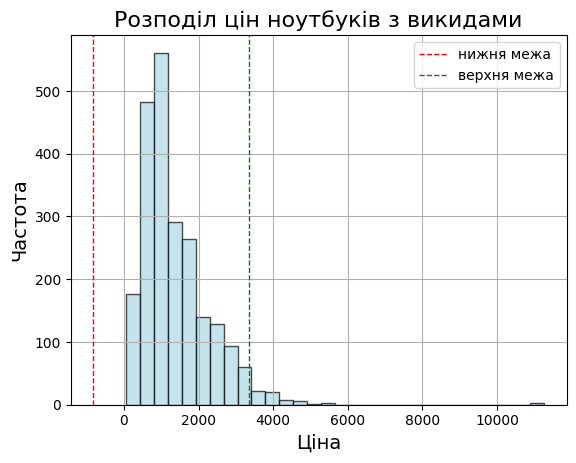

In [ ]:
plt.hist(df['price'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='нижня межа')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='верхня межа')
plt.title('Розподіл цін ноутбуків з викидами', fontsize=16)
plt.xlabel('Ціна', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend()
plt.grid()

Переглянувши які самі дані виходять за верхню межу, можна зробити висновок, що там немає описок, бо така висока ціна пов'язана із їх продуктивністю, новизною та типом графічної карти

Перетворення категоріальних змінних у числові
Використовуйте one-hot encoding для категоріальних змінних, якщо це доречно


In [ ]:
columns_to_check = ['harddisk', 'screen_size', 'ram', 'cpu_speed', 'rating']
for column in columns_to_check:
    df = remove_outliers(df, column)

In [ ]:
categorical_columns = ['brand', 'model', 'color', 'cpu', 'os', 'graphics']  # додайте інші категоріальні колонки за потреби
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Обчислюю кореляцію

Значення від -1 до 1. Значення ближче до 1 або -1 вказують на сильну кореляцію. Позитивна кореляція (приблизно 1) означає, що коли одне значення зростає, інше також зростає. Від'ємна кореляція (приблизно -1) означає, що коли одне значення зростає, інше зменшується.

In [ ]:
correlation_matrix = df.corr()

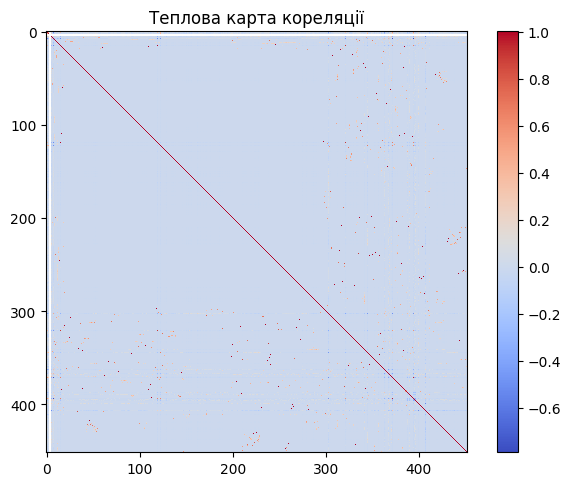

In [ ]:
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.tight_layout()
plt.title('Теплова карта кореляції')
plt.show()

Виводжу діаграми

Виводжу об'єм РАМ (присутній один викид)

Text(0, 0.5, 'Кількість')

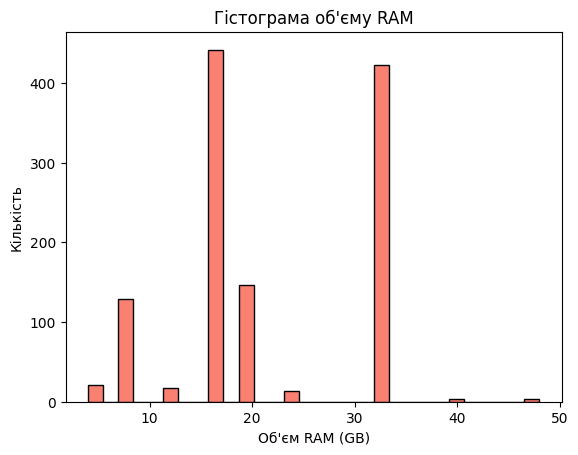

In [ ]:
plt.hist(df['ram'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Гістограма об\'єму RAM')
plt.xlabel('Об\'єм RAM (GB)')
plt.ylabel('Кількість')

Text(0, 0.5, "Об'єм RAM (GB)")

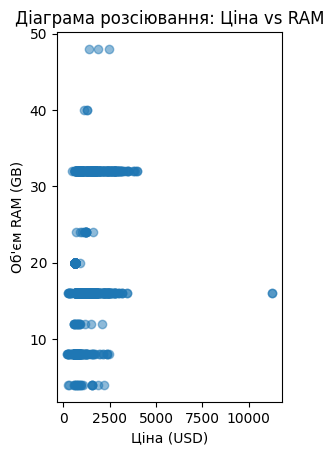

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(df['price'], df['ram'], alpha=0.5)
plt.title('Діаграма розсіювання: Ціна vs RAM')
plt.xlabel('Ціна (USD)')
plt.ylabel('Об\'єм RAM (GB)')

Text(0, 0.5, "Об'єм жорсткого диска (GB)")

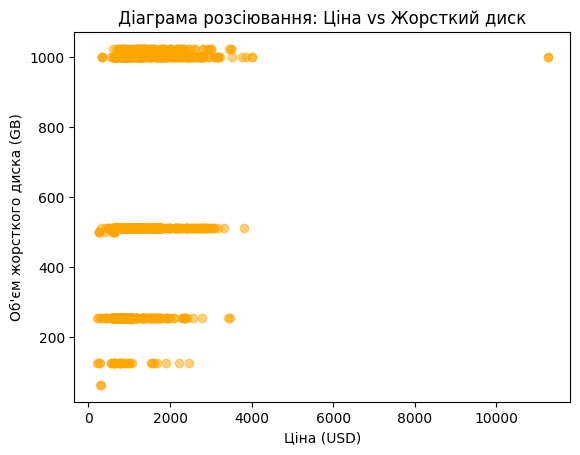

In [ ]:

plt.scatter(df['price'], df['harddisk'], alpha=0.5, color='orange')
plt.title('Діаграма розсіювання: Ціна vs Жорсткий диск')
plt.xlabel('Ціна (USD)')
plt.ylabel('Об\'єм жорсткого диска (GB)')

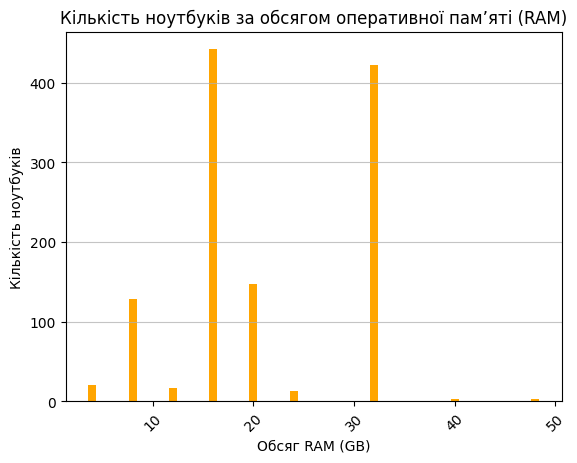

In [ ]:
ram_counts = df['ram'].value_counts()

plt.bar(ram_counts.index, ram_counts.values, color='orange')
plt.title('Кількість ноутбуків за обсягом оперативної пам’яті (RAM)')
plt.xlabel('Обсяг RAM (GB)')
plt.ylabel('Кількість ноутбуків')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

У висновку

Описові питання

Який розподіл цін на комп'ютери в наборі даних?

Це питання допомагає визначити, як ціни розподілені: чи є у них велика варіативність, чи переважають певні цінові діапазони.

Яка середня швидкість процесора (CPU Speed) у комп'ютерах з різними розмірами оперативної пам'яті (RAM)?

Це питання дозволяє дослідити, як швидкість процесора корелює з розміром оперативної пам'яті.

Яка середня ємність жорсткого диска у комп'ютерах з різними розмірами екрана?

Це питання може вказати на тенденції у ринку комп'ютерів, пов'язані з розмірами екранів і ємностями жорстких дисків.

Яка кореляція між рейтингом комп'ютерів та їх ціною?

Це дозволяє виявити, чи є зв'язок між споживчими оцінками продуктів і їх вартістю.

Як розподіляються бренди комп'ютерів у наборі даних? Чи переважає якийсь один бренд?

Це питання допоможе виявити, які бренди найбільш представлені на ринку.

Які типи операційних систем (OS) найчастіше використовуються в даному наборі даних?

Це може допомогти зрозуміти, яка операційна система користується найбільшою популярністю.

Які комп'ютери мають вищий рейтинг, і які характеристики вони мають (наприклад, розмір жорсткого диска, оперативної пам'яті, швидкість процесора)?

Це питання може допомогти виявити, які характеристики є ключовими для отримання високих оцінок.

Чи є залежність між розміром жорсткого диска та оперативною пам'яттю?

Це питання дозволяє дослідити, чи більші жорсткі диски зазвичай пов'язані з більшою оперативною пам'яттю.

Висновок: Вартість комп'ютерів значно варіюється в залежності від характеристик, таких як обсяг оперативної пам'яті та ємність жорсткого диска.

Гіпотеза: Комп'ютери з великою оперативною пам'яттю (більше 16 ГБ) і жорстким диском обсягом понад 1 ТБ матимуть вищу ціну.

Висновок: Існує сильна кореляція між ціною і рейтингом комп'ютерів.

Гіпотеза: Коли ціна зростає, рейтинг комп'ютера також зростає.

Висновок: Бренди, які є найбільш популярними в наборі даних, можуть бути тими, які мають найбільшу частку ринку.

Гіпотеза: Бренди, які представлені в наборі даних, матимуть значну частку ринку.

Висновок: Розмір екрана може впливати на ємність жорсткого диска.

Гіпотеза: Комп'ютери з більшими екранами матимуть вищу ємність жорсткого диска через більші вимоги до зберігання даних.

Висновок: Операційні системи можуть мати різний рівень представлення в залежності від бренду.

Гіпотеза: Деякі бренди комп'ютерів можуть переважно постачатися з певними операційними системами (наприклад, Windows або macOS).